# Classify galaxies based on types - spiral, elliptical, irregular

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as ex

%matplotlib inline

In [2]:
galaxy = pd.read_csv("GalaxyZoo1_DR_table2.csv")

In [3]:
galaxy.head()

OBJID           RA          DEC  NVOTE   P_EL   P_CW  P_ACW  \
0  587727178986356823  00:00:00.41  -10:22:25.7     59  0.610  0.034  0.000   
1  587727227300741210  00:00:00.74  -09:13:20.2     18  0.611  0.000  0.167   
2  587727225153257596  00:00:01.03  -10:56:48.0     68  0.735  0.029  0.000   
3  587730774962536596  00:00:01.38  +15:30:35.3     52  0.885  0.019  0.000   
4  587731186203885750  00:00:01.55  -00:05:33.3     59  0.712  0.000  0.000   

   P_EDGE   P_DK   P_MG   P_CS  P_EL_DEBIASED  P_CS_DEBIASED  SPIRAL  \
0   0.153  0.153  0.051  0.186          0.610          0.186       0   
1   0.222  0.000  0.000  0.389          0.203          0.797       1   
2   0.147  0.074  0.015  0.176          0.432          0.428       0   
3   0.058  0.019  0.019  0.077          0.885          0.077       0   
4   0.220  0.068  0.000  0.220          0.640          0.290       0   

   ELLIPTICAL  UNCERTAIN  
0           0          1  
1           0          0  
2           0          1  
3           1          0  
4           0          1

### Dataset Description

<!-- OBJID	SDSS DR7 object ID
RA, DEC	RA and dec in J2000.0
REDSHIFT	spectroscopic redshift from SDSS
GZ1_MORPHOLOGY	Galaxy Zoo 1 morphology according to the Land et al. (2008) "clean" criterion. This is an integer where 0 = indeterminate, 1 = early type, 3 = merger, 4 = late type
BPT_CLASS	Spectroscopic classification of galaxy based on emission lines ratios in the BPT diagram. 0 = no emission lines, 1 = star-forming, 2 = composite, 3 = Seyfert and 4 = LINER.
U,G,R,I,Z	SDSS model magnitudes. These are extinction-corrected but not k-corrected.
SIGMA, SIGMA_ERR	Stellar velocity dispersion (and error) measured using GANDALF
LOG_MSTELLAR	log of stellar mass [M_sun]
L_O3	Extinction-corrected [OIII] luminosity -->

1. OBJID --> Object ID
2. RA --> Right Ascension (The celestial equivalent of longitude) => hours : min : sec
3. DEC --> Declination (The celestial sphere's equivalent of latitude) => + and - refer to north and south, respectively
4. CW --> Clockwise
5. ACW --> Anti clockwise
...
...
etc

Column discription Name is not that much matter at all for any model, We have to identify important feature(columns) by EDA and data preprocessing

In [4]:
galaxy.tail()

OBJID           RA          DEC  NVOTE   P_EL   P_CW  \
667939  587727226763870322  23:59:58.76  -09:41:34.7     35  0.171  0.800   
667940  587730775499407475  23:59:58.78  +15:49:01.3     21  0.810  0.048   
667941  587727223024124280  23:59:58.81  +15:39:49.4     28  0.286  0.000   
667942  587730774425600239  23:59:59.02  +15:09:18.8     23  0.391  0.000   
667943  587727177912615023  23:59:59.37  -11:11:31.5     54  0.556  0.000   

        P_ACW  P_EDGE   P_DK   P_MG   P_CS  P_EL_DEBIASED  P_CS_DEBIASED  \
667939  0.000   0.029  0.000  0.000  0.829          0.057          0.943   
667940  0.000   0.095  0.048  0.000  0.143          0.758          0.193   
667941  0.071   0.393  0.179  0.071  0.464          0.099          0.603   
667942  0.043   0.000  0.130  0.435  0.043          0.390          0.045   
667943  0.037   0.333  0.074  0.000  0.370          0.153          0.722   

        SPIRAL  ELLIPTICAL  UNCERTAIN  
667939       1           0          0  
667940       0           0          1  
667941       0           0          1  
667942       0           0          1  
667943       1           0          0

In [5]:
galaxy.shape

(667944, 16)

In [6]:
galaxy.duplicated().sum()

0

In [7]:
galaxy.isnull().sum()

OBJID            0
RA               0
DEC              0
NVOTE            0
P_EL             0
P_CW             0
P_ACW            0
P_EDGE           0
P_DK             0
P_MG             0
P_CS             0
P_EL_DEBIASED    0
P_CS_DEBIASED    0
SPIRAL           0
ELLIPTICAL       0
UNCERTAIN        0
dtype: int64

Great, Our dataset is clean.. so we don't have to worry about 'null' and 'duplicate' values

In [11]:
galaxy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667944 entries, 0 to 667943
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OBJID          667944 non-null  int64  
 1   RA             667944 non-null  object 
 2   DEC            667944 non-null  object 
 3   NVOTE          667944 non-null  int64  
 4   P_EL           667944 non-null  float64
 5   P_CW           667944 non-null  float64
 6   P_ACW          667944 non-null  float64
 7   P_EDGE         667944 non-null  float64
 8   P_DK           667944 non-null  float64
 9   P_MG           667944 non-null  float64
 10  P_CS           667944 non-null  float64
 11  P_EL_DEBIASED  667944 non-null  float64
 12  P_CS_DEBIASED  667944 non-null  float64
 13  SPIRAL         667944 non-null  int64  
 14  ELLIPTICAL     667944 non-null  int64  
 15  UNCERTAIN      667944 non-null  int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 81.5+ MB


In [12]:
galaxy.describe()

OBJID          NVOTE           P_EL           P_CW  \
count  6.679440e+05  667944.000000  667944.000000  667944.000000   
mean   5.878143e+17      38.760986       0.535947       0.074007   
std    1.796023e+14      13.827837       0.284315       0.174440   
min    5.877230e+17       4.000000       0.000000       0.000000   
25%    5.877320e+17      28.000000       0.306000       0.000000   
50%    5.877386e+17      34.000000       0.581000       0.016000   
75%    5.877428e+17      51.000000       0.783000       0.051000   
max    5.888489e+17      94.000000       1.000000       1.000000   

               P_ACW         P_EDGE           P_DK           P_MG  \
count  667944.000000  667944.000000  667944.000000  667944.000000   
mean        0.080736       0.205066       0.072924       0.031244   
std         0.179102       0.216642       0.085788       0.089369   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.054000       0.018000       0.000000   
50%         0.021000       0.130000       0.053000       0.000000   
75%         0.062000       0.275000       0.103000       0.020000   
max         1.000000       1.000000       1.000000       1.000000   

                P_CS  P_EL_DEBIASED  P_CS_DEBIASED         SPIRAL  \
count  667944.000000  667944.000000  667944.000000  667944.000000   
mean        0.359850       0.393508       0.483439       0.284792   
std         0.298643       0.301595       0.321747       0.451316   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.102000       0.106000       0.180000       0.000000   
50%         0.267000       0.347000       0.462000       0.000000   
75%         0.586000       0.664000       0.789000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

          ELLIPTICAL      UNCERTAIN  
count  667944.000000  667944.000000  
mean        0.093107       0.622102  
std         0.290582       0.484862  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       1.000000  
75%         0.000000       1.000000  
max         1.000000       1.000000

From the above result, we can clearly say that feature 'OBJID' is useless here.

In [13]:
galaxy.value_counts()

OBJID               RA           DEC          NVOTE  P_EL   P_CW   P_ACW  P_EDGE  P_DK   P_MG  P_CS   P_EL_DEBIASED  P_CS_DEBIASED  SPIRAL  ELLIPTICAL  UNCERTAIN
587722952230174996  15:44:59.30  -00:28:31.0  33     0.273  0.000  0.030  0.606   0.091  0.0   0.636  0.165          0.739          0       0           1            1
587741727113543812  11:59:32.92  +25:36:38.5  60     0.400  0.150  0.067  0.300   0.083  0.0   0.517  0.356          0.560          0       0           1            1
587741727113347154  11:57:34.65  +25:39:32.6  36     0.528  0.028  0.028  0.389   0.028  0.0   0.444  0.396          0.574          0       0           1            1
587741727113347185  11:57:09.85  +25:34:39.1  56     0.393  0.000  0.018  0.554   0.036  0.0   0.571  0.354          0.610          0       0           1            1
587741727113347204  11:57:20.17  +25:39:52.6  32     0.312  0.344  0.000  0.344   0.000  0.0   0.688  0.166          0.834          1       0           0            1
   

# EDA

In [14]:
print("Spiral: \n", galaxy['SPIRAL'].value_counts())
print("\nELLIPTICAL: \n", galaxy['ELLIPTICAL'].value_counts())
print("\nUNCERTAIN: \n", galaxy['UNCERTAIN'].value_counts())

Spiral: 
 0    477719
1    190225
Name: SPIRAL, dtype: int64

ELLIPTICAL: 
 0    605754
1     62190
Name: ELLIPTICAL, dtype: int64

UNCERTAIN: 
 1    415529
0    252415
Name: UNCERTAIN, dtype: int64


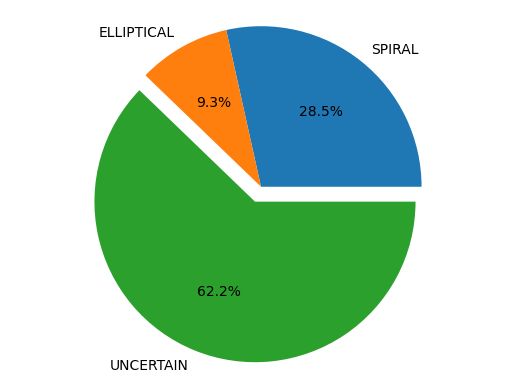

In [15]:
labels = ("SPIRAL", "ELLIPTICAL", "UNCERTAIN")
sizes = (190225, 62190, 415529)  # '1's
explode = (0,0,0.1)

plt.pie(sizes, labels=labels, explode=explode, autopct="%1.1f%%")  # To add percent of each slice. We write autopct='%1.1f%%'
plt.axis("equal")
plt.show()

In [16]:
ex.pie(galaxy, names='SPIRAL', title='Propotion Of Different Class', hole=0.33)

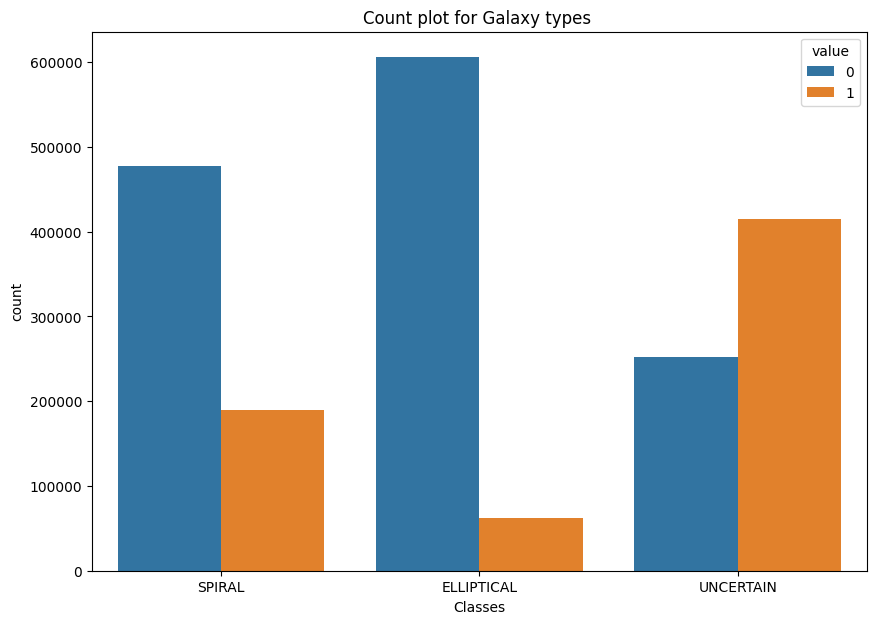

In [17]:
plt.figure(figsize=(10,7))
plt.title('Count plot for Galaxy types ')
countplt = galaxy[['SPIRAL','ELLIPTICAL','UNCERTAIN']]
sns.countplot(x="variable",hue='value', data=pd.melt(countplt))
plt.xlabel('Classes')
plt.show()

From the above graph, we can clearly say that All 3 classes are imbalance data class

The first column is a unique identifier which cannot be a feature for our model, and the second and third columns are the absolute positions of galaxies which do not correlate with our classes/targets, so we can remove them all

In [18]:
galaxy.drop(['OBJID', 'RA', 'DEC'], axis=1, inplace=True)

In [19]:
galaxy.head()

NVOTE   P_EL   P_CW  P_ACW  P_EDGE   P_DK   P_MG   P_CS  P_EL_DEBIASED  \
0     59  0.610  0.034  0.000   0.153  0.153  0.051  0.186          0.610   
1     18  0.611  0.000  0.167   0.222  0.000  0.000  0.389          0.203   
2     68  0.735  0.029  0.000   0.147  0.074  0.015  0.176          0.432   
3     52  0.885  0.019  0.000   0.058  0.019  0.019  0.077          0.885   
4     59  0.712  0.000  0.000   0.220  0.068  0.000  0.220          0.640   

   P_CS_DEBIASED  SPIRAL  ELLIPTICAL  UNCERTAIN  
0          0.186       0           0          1  
1          0.797       1           0          0  
2          0.428       0           0          1  
3          0.077       0           1          0  
4          0.290       0           0          1

array([[<Axes: title={'center': 'NVOTE'}>,
        <Axes: title={'center': 'P_EL'}>,
        <Axes: title={'center': 'P_CW'}>,
        <Axes: title={'center': 'P_ACW'}>],
       [<Axes: title={'center': 'P_EDGE'}>,
        <Axes: title={'center': 'P_DK'}>,
        <Axes: title={'center': 'P_MG'}>,
        <Axes: title={'center': 'P_CS'}>],
       [<Axes: title={'center': 'P_EL_DEBIASED'}>,
        <Axes: title={'center': 'P_CS_DEBIASED'}>,
        <Axes: title={'center': 'SPIRAL'}>,
        <Axes: title={'center': 'ELLIPTICAL'}>],
       [<Axes: title={'center': 'UNCERTAIN'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

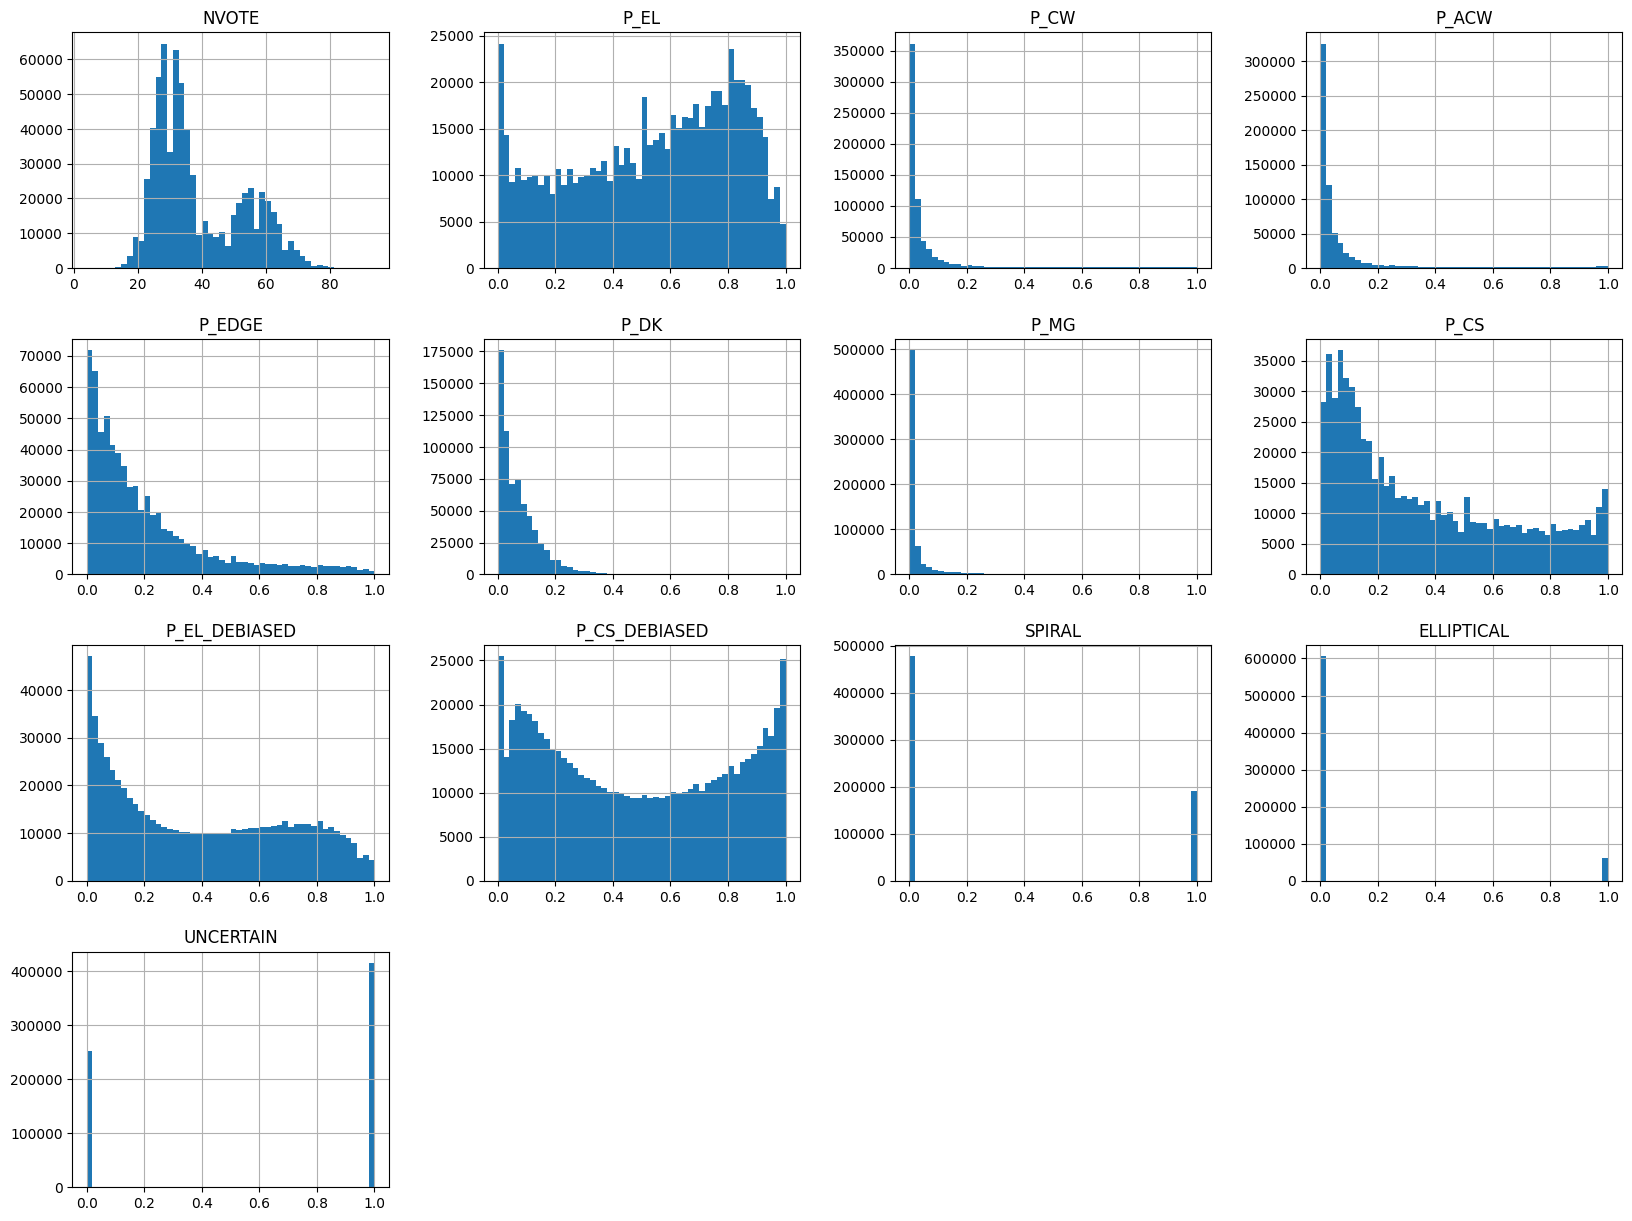

In [20]:
galaxy.hist(bins=50, figsize=(20,15))

<Axes: >

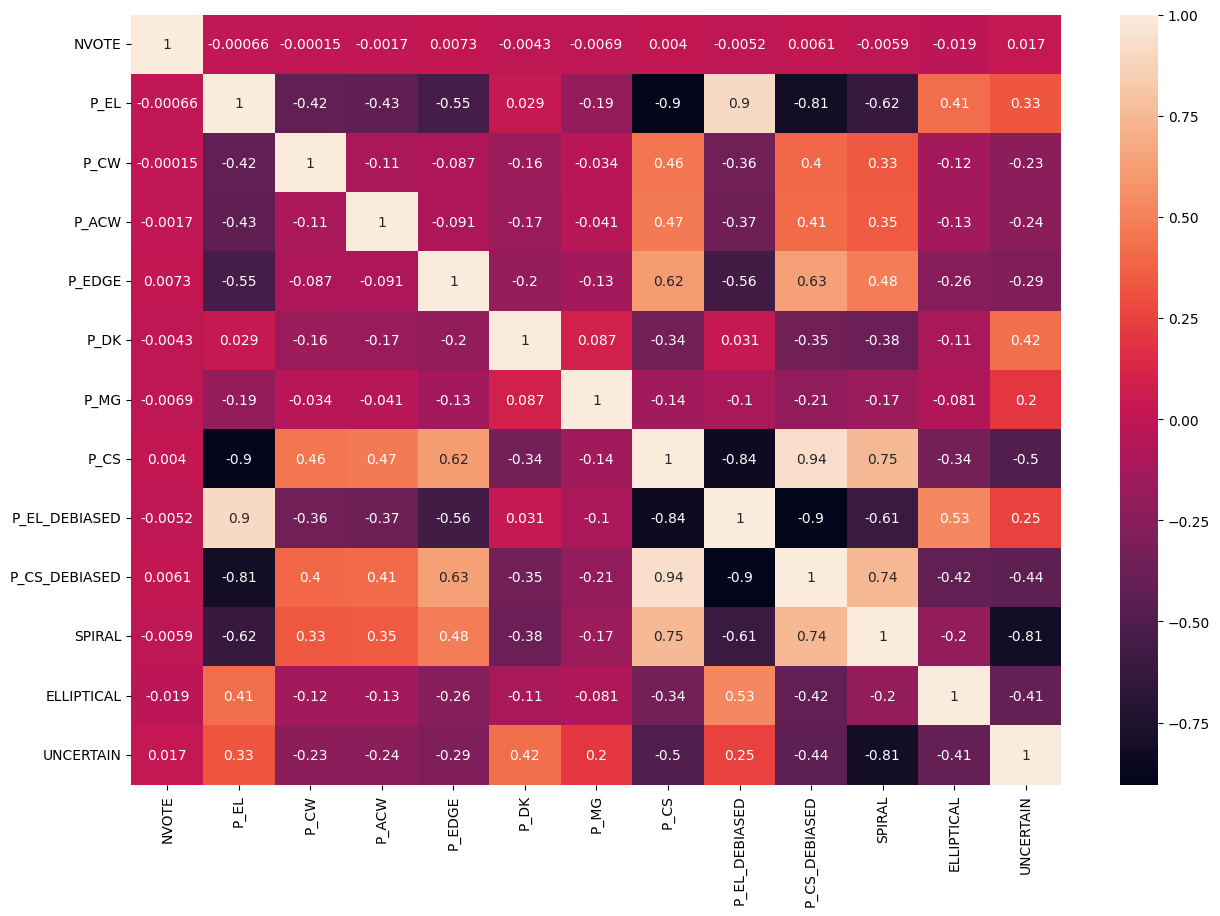

In [21]:
corr = galaxy.corr()
plt.subplots(figsize = (15,10))
sns.heatmap(corr, annot=True)

<ipython-input-22-fcafb1bc9572>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-22-fcafb1bc9572>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-22-fcafb1bc9572>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

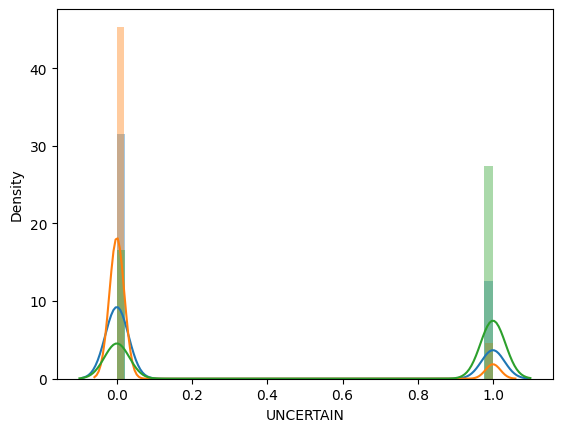

In [22]:
# labels = ('SPIRAL','ELLIPTICAL','UNCERTAIN')

for i in labels:
  sns.distplot(galaxy[i])

<ipython-input-23-faa12eee3649>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='P_CS', ylabel='Density'>

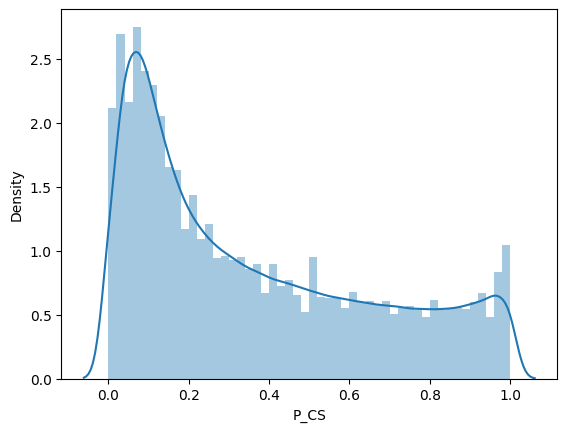

In [23]:
sns.distplot(galaxy["P_CS"])

<Axes: xlabel='SPIRAL', ylabel='P_CS'>

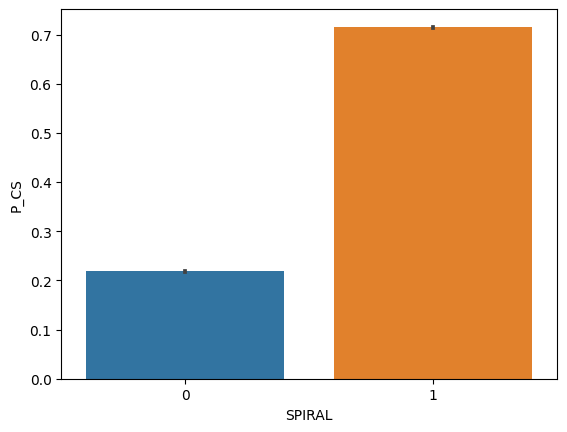

In [24]:
sns.barplot(x="SPIRAL", y="P_CS", data = galaxy)

<Axes: xlabel='SPIRAL', ylabel='P_CS_DEBIASED'>

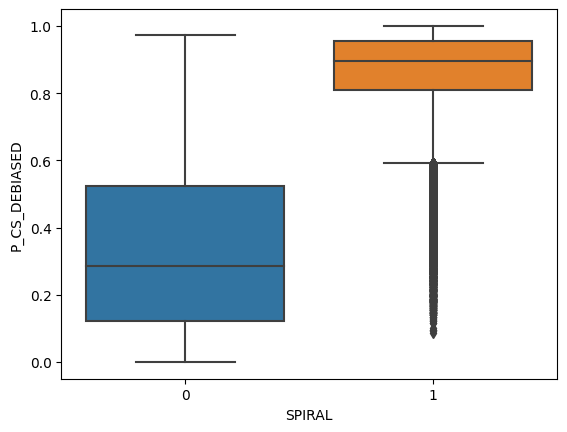

In [25]:
sns.boxplot(x="SPIRAL", y="P_CS_DEBIASED", data = galaxy)

In [26]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=galaxy['P_CW'], name='Box Plot',boxmean=True)
tr2=go.Histogram(x=galaxy['P_CW'], name=' Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of P_CW")
fig.show()

In [27]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=('Perason Correaltion', 'Spearman Correaltion'))
colorscale=     [[1.0              , "rgb(165,0,38)"],
                [0.8888888888888888, "rgb(215,48,39)"],
                [0.7777777777777778, "rgb(244,109,67)"],
                [0.6666666666666666, "rgb(253,174,97)"],
                [0.5555555555555556, "rgb(254,224,144)"],
                [0.4444444444444444, "rgb(224,243,248)"],
                [0.3333333333333333, "rgb(171,217,233)"],
                [0.2222222222222222, "rgb(116,173,209)"],
                [0.1111111111111111, "rgb(69,117,180)"],
                [0.0               , "rgb(49,54,149)"]]

s_val = galaxy.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=0.7,ygap=0.7),
    row=1, col=1
)

s_val = galaxy.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=0.7,ygap=0.7),
    row=2, col=1
)
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)
fig.update_layout(height=700, width=900, title_text="Numeric Correaltions")
fig.show()

- So, From the above correlations, we clearly see our answers.. now we don't need to perform any further EDA tasks.
- Not a single feature is more related to other features

# Splitting the data

In [28]:
X = galaxy.drop(['SPIRAL','ELLIPTICAL','UNCERTAIN'],axis=1).values
y = galaxy[['SPIRAL','ELLIPTICAL','UNCERTAIN']].values


# # # ----- Alternate approach ----- # # #

# X = galaxy.iloc[:, :10].values
# y = galxy.iloc[:, 10:13].values

In [29]:
# # Suppose if our dataset contains some missing value (NaN) then we remove that values using "Imputer"

# from sklearn.preprocessing import Imputer

# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(X[:, :])
# X[:,:] = imputer.transform(X[:, :])

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building Neural Networks for Galaxy Classification Model

In [32]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
nn_classifier = Sequential()  # Initialising ANN

In [42]:
# 10 input features
# 2 hidden layers --> 6 nodes each
# 3 output nodes

# Adding the input layer and the first hidden layer
nn_classifier.add(Dense(10, activation = 'relu'))

# Adding the second hidden layer
nn_classifier.add(Dense(6, activation = 'relu'))

# Adding the output layer
nn_classifier.add(Dense(3, activation = 'sigmoid'))

# Compiling the ANN
nn_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

import time
start = time.perf_counter()

In [45]:
nn_classifier.fit(X_train, y_train, epochs=20)

print('\nTIME ELAPSED {}Seconds'.format(time.perf_counter() - start))

Epoch 1/20
16699/16699 [==============================] - 33s 2ms/step - loss: 0.1584 - accuracy: 0.8966
Epoch 2/20
16699/16699 [==============================] - 32s 2ms/step - loss: 0.1481 - accuracy: 0.8995
Epoch 3/20
16699/16699 [==============================] - 35s 2ms/step - loss: 0.1454 - accuracy: 0.9002
Epoch 4/20
16699/16699 [==============================] - 32s 2ms/step - loss: 0.1442 - accuracy: 0.9005
Epoch 5/20
16699/16699 [==============================] - 35s 2ms/step - loss: 0.1433 - accuracy: 0.9012
Epoch 6/20
16699/16699 [==============================] - 41s 2ms/step - loss: 0.1426 - accuracy: 0.9013
Epoch 7/20
16699/16699 [==============================] - 33s 2ms/step - loss: 0.1420 - accuracy: 0.9018
Epoch 8/20
16699/16699 [==============================] - 32s 2ms/step - loss: 0.1415 - accuracy: 0.9020
Epoch 9/20
16699/16699 [==============================] - 33s 2ms/step - loss: 0.1411 - accuracy: 0.9019
Epoch 10/20
16699/16699 [==============================

### Accuracy Plot

<ipython-input-46-aa4b7a2f26d4>:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



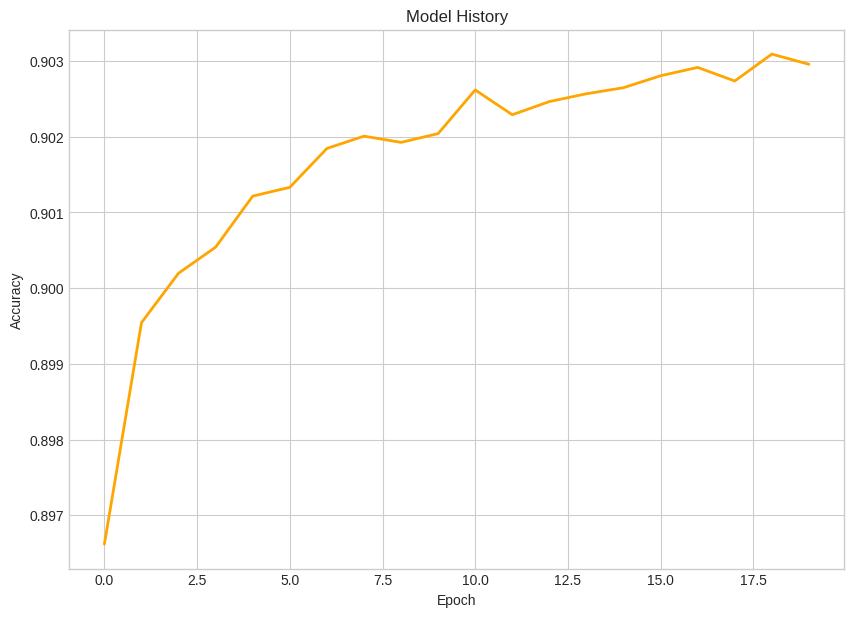

In [46]:
mod_history = pd.DataFrame(nn_classifier.history.history)
plt.figure(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
plt.title('Model History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(mod_history['accuracy'],color='orange',lw=2)

In [67]:
# y_pred = (nn_classifier.predict(X_test) > 0.5).astype("int32")
# y_pred = nn_classifier.predict_classes(X_test)
y_pred = nn_classifier.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

from sklearn.metrics import multilabel_confusion_matrix, classification_report

multilabel_confusion_matrix(y_test.argmax(axis=1), y_pred)
print(classification_report(y_test.argmax(axis=1), y_pred))

4175/4175 [==============================] - 7s 2ms/step


AxisError: ignored

In [56]:
# Predicting the Test set results

y_pred = nn_classifier.predict(X_test)
y_pred = (y_pred > 0.5)

4175/4175 [==============================] - 5s 1ms/step


In [57]:
y_pred

array([[False, False,  True],
       [False, False,  True],
       [False, False,  True],
       ...,
       [False, False,  True],
       [False, False,  True],
       [False,  True, False]])